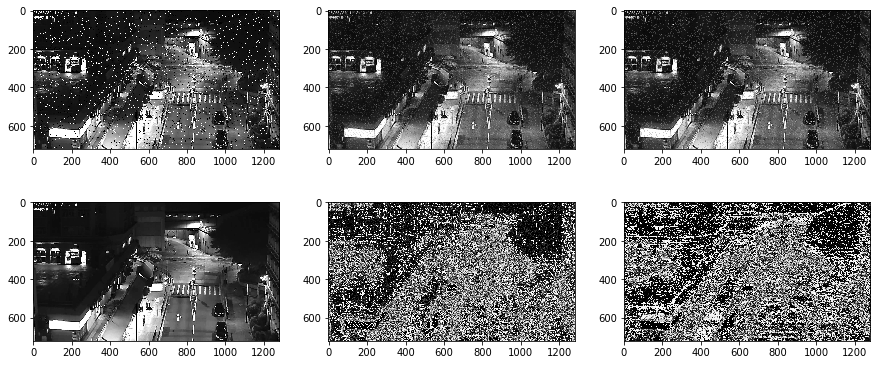

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc as img
from scipy import ndimage
import random

def sp_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


image = img.imread('street.jpg' ,mode ='F')
image = sp_noise(image, 0.03)

# filter A
a = np.array([[1/16.0, 2/16.0, 1/16.0],
              [2/16.0, 4/16.0, 2/16.0],
              [1/16.0, 2/16.0, 1/16.0]])
filtera = ndimage.convolve(image, a, mode='nearest', cval=0.0)

# filter B
b = np.array([[0, 1/5.0, 0],
              [1/5.0, 1/5.0, 1/5.0],
              [0, 1/5.0, 0]])
filterb = ndimage.convolve(image, b, mode='nearest', cval=0.0)

# filter C
filterc = ndimage.median_filter(image, 3)

# filter D
d = np.array([[-1, -2, -1], 
             [-2, 12, -2], 
             [-1, -2, -1]])
filterd = ndimage.convolve(image, d, mode='nearest', cval=0.0)

# filter E
e = np.array([[-1, -2, -1],
             [0, 0, 0],
             [1, 2, 1]])
filtere = ndimage.convolve(image, e, mode='nearest', cval=0.0)

fig = plt.figure(figsize=(15,10))

plt.subplot(331)
plt.imshow(image, cmap='gray')

plt.subplot(332)
plt.imshow(filtera, cmap='gray')
# a: poorly removes noise such as "salt and pepper"

plt.subplot(333)
plt.imshow(filterb, cmap='gray')
# b: poorly removes noise such as "salt and pepper"

plt.subplot(334)
plt.imshow(filterc, cmap='gray')
# c: works slower than the other specified noise-canceling filters

plt.subplot(335)
plt.imshow(filterd, cmap='gray')
# d: will destroy all lines of one pixel thickness in the image

plt.subplot(336)
plt.imshow(filtere, cmap='gray')
# e: will destroy all lines of one pixel thickness in the image

plt.show()
